<a href="https://colab.research.google.com/github/haji8-de/AIFFEL_quest_rs/blob/main/Exploration/Ex05/NLP_word_embeding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 실습

In [7]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

print("슝~")

슝~


In [8]:
target_X = {
    '장미': [4.1, 1.2, -2.4, 0.5, 4.1],
    '튤립': [3.1, 0.5, 3.6, 1.7, 5.8],
    '백합': [2.9, -1.3, 0.4, 1.1, 3.7],
    '데이지': [5.4, 2.5, 4.6, -1.0, 3.6]
}
target_Y = {
    '거미': [-1.5, 0.2, -0.6, -4.6, -5.3],
    '모기': [0.4, 0.7, -1.9, -4.5, -2.9],
    '파리': [0.9, 1.4, -2.3, -3.9, -4.7],
    '메뚜기': [0.7, 0.9, -0.4, -4.1, -3.9]
}
attribute_A = {
    '사랑':[2.8,  4.2, 4.3,  0.3, 5.0],
    '행복':[3.8,  3. , -1.2,  4.4, 4.9],
    '웃음':[3.7, -0.3,  1.2, -2.5, 3.9]
}
attribute_B = {
    '재난': [-0.2, -2.8, -4.7, -4.3, -4.7],
    '고통': [-4.5, -2.1,  -3.8, -3.6, -3.1],
    '증오': [-3.6, -3.3, -3.5,  -3.7, -4.4]
}

print("슝~")

슝~


In [9]:
X = np.array([v for v in target_X.values()])
Y = np.array([v for v in target_Y.values()])
print(X)
print(Y)

[[ 4.1  1.2 -2.4  0.5  4.1]
 [ 3.1  0.5  3.6  1.7  5.8]
 [ 2.9 -1.3  0.4  1.1  3.7]
 [ 5.4  2.5  4.6 -1.   3.6]]
[[-1.5  0.2 -0.6 -4.6 -5.3]
 [ 0.4  0.7 -1.9 -4.5 -2.9]
 [ 0.9  1.4 -2.3 -3.9 -4.7]
 [ 0.7  0.9 -0.4 -4.1 -3.9]]


In [10]:
A = np.array([v for v in attribute_A.values()])
B = np.array([v for v in attribute_B.values()])
print(A)
print(B)

[[ 2.8  4.2  4.3  0.3  5. ]
 [ 3.8  3.  -1.2  4.4  4.9]
 [ 3.7 -0.3  1.2 -2.5  3.9]]
[[-0.2 -2.8 -4.7 -4.3 -4.7]
 [-4.5 -2.1 -3.8 -3.6 -3.1]
 [-3.6 -3.3 -3.5 -3.7 -4.4]]


In [11]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

print(s(target_X['장미'], A, B))

0.6457646122337399


In [12]:
print(s(target_Y['거미'], A, B))

-0.794002342033094


In [13]:
print(s(X, A, B))
print(round(np.mean(s(X, A, B)), 3))

[0.29551989 0.51723181 0.26499096 0.50924109]
0.397


In [14]:
print(s(Y, A, B))
print(round(np.mean(s(Y, A, B)), 3))

[-0.44713039 -0.28310853 -0.33144878 -0.26030641]
-0.33


In [15]:
def weat_score(X, Y, A, B):

    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    # np.std <- 표준 편차 1.41421356..
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return  (mean_X-mean_Y)/std_dev

print(round(weat_score(X, Y, A, B), 3))

1.932


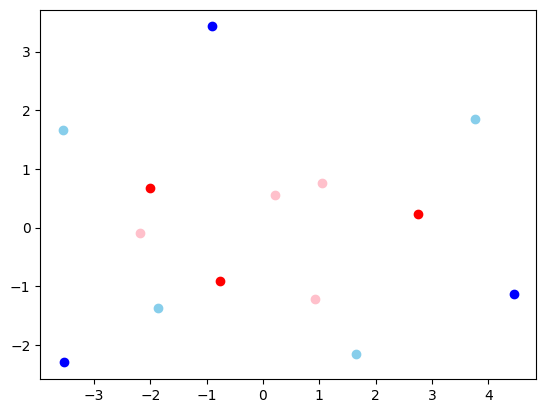

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')

In [17]:
!sudo mkdir -p ~/work/weat/data
!ln -s content/GoogleNews-vectors-negative300.bin ~/work/weat/data/GoogleNews-vectors-negative300.bin

In [18]:
!pip install gensim==4.3.2

# 의존성 연결을 위해 다운그레이드를 진행합니다.
!pip install scipy==1.12.0 numpy==1.26.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 39.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=26332389 sha256=dc43644d329f65c9e22c4902af5a75cbe723367bff357f4d1883539e437f995b
  Stored in directory: /root/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
  Using cached numpy-1.26.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 20.5 MB/s eta 0:00:00
Using cached numpy-1.26.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully unin

In [19]:
import os
from gensim.models import KeyedVectors
import numpy as np

data_dir = os.path.join(os.getenv("HOME"), '/work/weat/data')
model_dir = os.path.join(data_dir, 'GoogleNews-vectors-negative300.bin')

# 50만개의 단어만 활용합니다. 메모리가 충분하다면 limit 파라미터값을 생략하여 300만개를 모두 활용할 수 있습니다.
w2v = KeyedVectors.load_word2vec_format(model_dir, binary=True, limit=500000)

KeyboardInterrupt: 

In [ ]:
w2v

In [ ]:
# print(len(w2v.vocab))   # Gensim 3.X 버전까지는 w2v.vocab을 직접 접근할 수 있습니다.
print(len(w2v.index_to_key))   # Gensim 4.0부터는 index_to_key를 활용해 vocab size를 알 수 있습니다.
print(len(w2v['I']))                    # 혹은 단어를 key로 직접 vector를 얻을 수 있습니다.
print(w2v.vectors.shape)

In [ ]:
w2v['happy']

In [ ]:
w2v.most_similar(positive=['happy'])

In [ ]:
w2v.most_similar(positive=['family'])

In [ ]:
w2v.most_similar(positive=['school'])

In [ ]:
target_X = ['science', 'technology', 'physics', 'chemistry', 'Einstein', 'NASA', 'experiment', 'astronomy']
target_Y = ['poetry', 'art', 'Shakespeare', 'dance', 'literature', 'novel', 'symphony', 'drama']
attribute_A = ['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
attribute_B = ['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

In [ ]:
target_X = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_Y = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_A = ['junk', 'canned', 'convenience', 'frozen', 'fast']
attribute_B = ['health', 'beneficial', 'good', 'nourishing', 'nutritious']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

In [ ]:
target_X = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_Y = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_A = ['book', 'essay', 'dictionary', 'magazine', 'novel']
attribute_B = ['news', 'report', 'statement', 'broadcast', 'word']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

In [ ]:
target_X = ['pizza', 'coke', 'hamburger', 'fries', 'steak', 'bacon', 'sausage']
target_Y = ['carrot', 'broccoli', 'spinach', 'lettuce', 'cucumber', 'avocado', 'peas']
attribute_A = ['delicious', 'tasty', 'yummy', 'flavorful', 'savory', 'appetizing']
attribute_B = ['healthy', 'nutritious', 'wholesome', 'organic', 'balanced', 'nourishing']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

In [ ]:
#메모리를 다시 비워줍시다.
del w2v
print("삭제 완료")

# 실습 _ 워드 임베딩



In [ ]:
!unzip --help

In [4]:
!sudo unzip -u /root/work/weat/data/synopsis.zip  -d /root/work/weat/data/synopsis/

Archive:  /root/work/weat/data/synopsis.zip
  inflating: /root/work/weat/data/synopsis/synopsis.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_SF.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_action.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_adult.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_adventure.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_animation.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_art.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_comedy.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_crime.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_documentary.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_drama.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_etc.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_family.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_fantasy.txt  
  inflating: /root/work/weat/data/synopsis/synopsis_ge

In [6]:
import os

data_dir = os.path.join(os.getenv("HOME"), "work/weat/data/synopsis")
file_name = os.path.join(data_dir, "synopsis.txt")

with open(file_name, 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [3]:
!sudo apt update
!sudo apt install openjdk-17-jdk -y
!echo 'export JAVA_HOME=$(dirname $(dirname $(readlink -f $(which java))))' >> ~/.bashrc
!source ~/.bashrc

!pip install konlpy

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,665 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,604 kB]
Fetched 11.7 MB in 2s (4,858 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
31 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: 

In [ ]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt

okt = Okt()
tokenized = []

with open(file_name, 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다.
        tokenized.append(res)

print("슝~")



FileNotFoundError: [Errno 2] No such file or directory: 'synopsis_horror.txt'

In [ ]:
print(len(tokenized))

71156


In [ ]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다.
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)
# model.most_similar(positive=['영화'])

[('작품', 0.9994346499443054),
 ('한국', 0.9986068606376648),
 ('축제', 0.9980291724205017),
 ('장편', 0.9978959560394287),
 ('대상', 0.9977461695671082),
 ('시네마', 0.9977395534515381),
 ('인권', 0.99763023853302),
 ('공식', 0.9975571632385254),
 ('베를린', 0.9971137642860413),
 ('유럽', 0.9969275593757629)]

In [ ]:
model.wv.most_similar(positive=['사랑'])

[('남자', 0.9994140863418579),
 ('여자', 0.9989416003227234),
 ('알', 0.9987884759902954),
 ('사람', 0.998765230178833),
 ('그', 0.9981358051300049),
 ('그녀', 0.9976829290390015),
 ('두', 0.9959092736244202),
 ('것', 0.995189905166626),
 ('서로', 0.9937131404876709),
 ('집', 0.9935786724090576)]

In [ ]:
model.wv.most_similar(positive=['연극'])

[('중국', 0.9988813996315002),
 ('최고', 0.9988598227500916),
 ('스', 0.9988571405410767),
 ('세계', 0.9988492131233215),
 ('촬영', 0.9988169074058533),
 ('작전', 0.9987375140190125),
 ('부', 0.9987212419509888),
 ('대통령', 0.99869304895401),
 ('파리', 0.9986653923988342),
 ('관객', 0.9986643195152283)]

In [ ]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0]))
    return ' '.join(result)

print("슝~")

슝~


In [ ]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다.
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [ ]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names_out()[23976])

23976
영화


In [ ]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다.
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다.

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n')

print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 시간, 다시, 아들, 소녀, 아내, 다른, 영화제, 사이, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 아빠, 생활, 통해, 모습, 기억, 죽음, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 결혼, 사고, 전쟁, 위기, 때문, 이제, 최고, 이자, 과거, 일상, 경찰, 간다, 상황, 미국, 운명, 결심, 관계, 현실, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 만난, 감정, 처음, 국제, 누구, 살인, 충격, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 의도, 동생, 하루, 위기, 계획, 정체, 한국, 

In [ ]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [ ]:
print(target_art)

['아빠', '음악', '운명', '결심', '지금', '여인', '이름', '이후', '준비', '만난', '감정', '처음', '누구', '충격', '그린']


In [ ]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


In [ ]:
genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)']

print("슝~")

슝~


In [ ]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(6, 33151)


In [ ]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

드라마: 자신, 영화제, 그녀, 사람, 사랑, 위해, 영화, 시작, 국제, 남자, 친구, 이야기, 여자, 아버지, 엄마, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남자, 남편, 여자, 사람, 친구, 위해, 마음, 섹스, 결혼, 서로, 아내, 
액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 친구, 모든, 목숨, 사실, 세계, 가족, 
코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 
전쟁: 전쟁, 위해, 전투, 시작, 작전, 독일군, 부대, 독일, 자신, 사람, 공격, 임무, 병사, 연합군, 미군, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 남자, 가족, 영화, 하나, 


In [ ]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [ ]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

NameError: name 'weat_score' is not defined

In [ ]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

WEAT score가 0.8 이상, -0.8 이하의 경우만 해석해 보면 아래와 같습니다.

* 예술영화와 일반영화, 그리고 드라마와 멜로로맨스의 WEAT score의 의미를 해석해보면 예술영화는 멜로로맨스, 일반영화는 드라마와 가깝다고 볼 수 있습니다. 부호가 마이너스이므로 사람의 편향과 반대라는 것을 알 수 있습니다.
* 예술영화와 일반영화, 그리고 멜로로맨스와 코미디의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 코디미는 일반 영화와 가깝다고 볼 수 있습니다.
* 예술영화와 일반영화, 그리고 멜로로맨스와 전쟁의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 전쟁은 일반 영화와 가깝다고 볼 수 있습니다.

In [9]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
import numpy as np;
import seaborn as sns;

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

# 과제 _ 워드 임베딩



In [2]:
import konlpy
import gensim
import sklearn
import seaborn

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

ModuleNotFoundError: No module named 'konlpy'

In [ ]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt' 'synopsis_horror.txt', 'synopsis_etc.txt',
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt',
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt',
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt',
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

## STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [ ]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt



def read_token_and_make_voca(file_name):
    okt = Okt()
    make_voka_2 = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    make_voka_2.append((word[0]))
    return make_voka_2

print("슝~")

슝~


In [ ]:
genre_temp = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt']
for genre in genre_temp:  #genre_txt:
  read_token_and_make_voca(genre)

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.


## STEP 2. 추출된 결과로 embedding model 만들기

In [ ]:
# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
print("새로운 Word2Vec 모델 생성 완료")

# 'make_voka'에 대한 TF-IDF 계산은 현재 target/attribute 단어 셋을 만드는 데 사용되지 않으므로 주석 처리합니다.
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(make_voka)
# print(X.shape)

## STEP 3. target, attribute 단어 셋 만들기

In [ ]:
len(model.wv)

In [ ]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names_out()[7080])

In [ ]:
# model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
# model.wv.most_similar(positive=['영화'])

In [ ]:
# n = 15
# w1_, w2_ = [], []
# for i in range(100):
#     w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
#     w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# # w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
# target_art, target_gen = [], []
# for i in range(100):
#     if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
#     if len(target_art) == n: break

# # w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
# for i in range(100):
#     if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
#     if len(target_gen) == n: break

## STEP 4. WEAT score 계산과 시각화

In [ ]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

In [ ]:
# X = np.array([model.wv[word] for word in target_art])
# Y = np.array([model.wv[word] for word in target_gen])

# for i in range(len(genre_temp)-1):
#     for j in range(i+1, len(genre_temp)-1):
#         A = np.array([model.wv[word] for word in attributes[i]])
#         B = np.array([model.wv[word] for word in attributes[j]])
#         matrix[i][j] = weat_score(X, Y, A, B)

# print("슝~")

In [ ]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
^C


FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

In [ ]:
import numpy as np;
import seaborn as sns;

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

# 프로젝트 루브릭
전체 영화 장르별로 예술/일반 영화에 대한 편향성 WEAT score가 상식에 부합하는 수치로 얻어졌으며 이를 잘 시각화하였다.

예술영화와 일반영화(상업영
화)라는 영화구분을 target
드라마 장르와 액션 장르라는 장르구분을 attribute로 삼아 WEAT score를 계산                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [8]:

import konlpy
import gensim
import sklearn
import seaborn
from konlpy.tag import Okt

okt = Okt()
print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

genre_txt_2 = ['synopsis_gen.txt', 'synopsis_art.txt']
genre_name_2 = ['일반', '예술']

def read_token_and_make_voca_2(file_name):
    okt = Okt()
    result = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0]))
    return result # Return the list of words, not a joined string

target_genre_movies_2 = []
for genre_file_name in genre_txt_2:
  tokens_from_file = read_token_and_make_voca_2(genre_file_name)
  target_genre_movies_2.append(tokens_from_file)
print(target_genre_movies_2)


0.6.0
4.3.2
1.6.1
0.13.2
synopsis_gen.txt 파일을 읽고 있습니다.
synopsis_art.txt 파일을 읽고 있습니다.
[['유사', '연령', '성별', '빈부', '차이', '정치', '입장', '불문', '국민', '통합', '온', '애국심', '성역', '일침', '다큐멘터리', '재작년', '전국', '민족', '민주', '유가족', '협의', '회의', '장기', '농성', '인상', '다큐멘터리', '민들레', '를', '독립영화', '집단', '눈사람', '이', '우리', '사회', '구석구석', '발', '애국심', '민족주의', '강요', '현장', '발굴', '카메라', '박홍', '서강대', '명예', '총장', '이도형', '한국', '논단', '발행', '축구', '해설', '신문선', '홍세화', '박노해', '등', '사회', '각계', '스타', '등장', '저', '신념', '토', '감독', '순', '최하', '동하', '이', '작품', '위해', '명', '인터뷰', '올해', '독립영화', '수상', '민족', '국가', '란', '공동체', '권력', '자', '민족', '국가', '란', '공동체', '신분', '부귀', '그', '자손', '자', '민족', '국가', '란', '공동체', '유지', '자', '따라서', '민족', '국가', '란', '공동체', '당위', '성과', '개인', '가치', '초월', '그', '존엄성', '끝', '창조', '뇌', '자', '종국', '민족', '국가', '란', '공동체', '해', '태내', '세뇌', '모든', '이', '삶', '행동', '자기', '복제', '순환', '고리', '영생', '애국', '원동력', '그', '순환', '골', '엽기', '살인', '사건', '발생', '장소', '관광', '투어', '팀', '그', '팀', '관광객', '살인', '사건', '관련', '히스테리', '컬', '반응', '

In [5]:

# all_genre_movies_2 = []
# for genre in genre_txt:
#   result_2 = read_token_and_make_voca_2(genre)
#   all_genre_movies_2.append(result_2)

vectorizer_2 = TfidfVectorizer()
X_2 = vectorizer_2.fit_transform(target_genre_movies_2[0], target_genre_movies_2[1])

# print(target_genre_movies_2.shape)

print(vectorizer_2.vocabulary_['영화'])
print(vectorizer_2.get_feature_names_out()[132])
print(f"'영화'의 인덱스: {vectorizer_2.vocabulary_['영화']}")
print(f"인덱스 132번 단어: {vectorizer_2.get_feature_names_out()[132]}")

print("-" * 30)

for k in range(len(target_genre_movies_2)):
  m1_2 = X_2[k].tocoo()
  w1_2 = [[i, j] for i, j in zip(m1_2.col, m1_2.data)]
  w1_2.sort(key=lambda x: x[1], reverse=True)
import os

data_dir = os.path.join(os.getenv("HOME"), "work/weat/data")
file_name = os.path.join(data_dir, "synopsis/synopsis.txt")

# with open(file_name, 'r') as file:
#     for i in range(20):
#         print(file.readline(), end='')

NameError: name 'TfidfVectorizer' is not defined

In [ ]:

print(len(target_genre_movies_2))
# target_genre_movies_2

In [3]:
# import os
n_2=15
m_2 = [X[i].tocoo() for i in range(X_2.shape[0])]

w_2 = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w_2)):
    w_2[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w2)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < n):
        if vectorizer.get_feature_names_out()[w_2[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w_2[i][j][0]])
            print(vectorizer.get_feature_names_out()[w_2[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()


NameError: name 'X_2' is not defined

In [ ]:
from gensim.models import Word2Vec

print(target_genre_movies_2)
# print(tokenized_2)

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model_2 = Word2Vec(target_genre_movies_2, vector_size=100, window=5, min_count=3, sg=0)
model_2.wv.most_similar(positive=['영화'])

In [ ]:
model.wv.most_similar(positive=['사랑'])
model.wv.most_similar(positive=['연극'])
model.wv.most_similar(positive=['영화'])

In [ ]:

attributes_2 = []
for i in range(len(w_2)):
    print(genre_name_2[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < n_2):
        if vectorizer_2.get_feature_names_out()[w_2[i][j][0]] in model_2.wv:
            attr.append(vectorizer_2.get_feature_names_out()[w_2[i][j][0]])
            print(vectorizer_2.get_feature_names_out()[w_2[i][j][0]], end=', ')
        j += 1
    attributes_2.append(attr)
    print("슝슝333")

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix

# Assuming 'your_array' is the numpy.ndarray causing the error
your_array = np.array([[0, 1, 0], [0, 0, 2], [3, 0, 0]])

# Convert the numpy array to a sparse Coordinate matrix (COO)
sparse_matrix = coo_matrix(your_array)

# Now you can safely call .tocoo() (though it's already a COO matrix)
# or pass the 'sparse_matrix' object to the function that expects a sparse input
# Example:
cy = sparse_matrix.tocoo() # This will work

In [ ]:
# # 모든 문서를 돌면 너무 많을 수 있으니 예시로 5개만 확인
# for k in range(min(5, len(target_genre_movies_2))):
#     m1_2 = X_2[k].tocoo()

#     # (단어인덱스, 점수) 쌍으로 묶어서 리스트 생성
#     w1_2 = [[i, j] for i, j in zip(m1_2.col, m1_2.data)]

#     # 점수(j) 기준 내림차순 정렬 (중요도 높은 단어 순)
#     w1_2.sort(key=lambda x: x[1], reverse=True)

#     # === [수정된 부분] 결과를 출력합니다 ===
#     print(f"문서 {k}의 상위 키워드:")

#     # 상위 5개 단어만 실제 단어로 바꿔서 출력
#     for idx, score in w1_2[:5]:
#         word = vectorizer_2.get_feature_names_out()[idx]
#         print(f"  - {word}: {score:.4f}")
#     print("")

In [ ]:

# # tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
# model_2 = Word2Vec(target_genre_movies_2, vector_size=100, window=5, min_count=3, sg=0)
# model_2.wv.most_similar(positive=['차이'])
# model_2.wv.most_similar(positive=['빈부'])
# model_2.wv.most_similar(positive=['영화'])
# print(target_genre_movies_2)


In [ ]:

# model_2.wv.most_similar(positive=['유사'])

In [ ]:
matrix_2 = [[0 for _ in range(len(genre_name_2))] for _ in range(len(genre_name_2))]
print("슝~")

In [ ]:

n = 15
word_voca_movie_gen = []
for i in range(100):
    for j in range(len(target_genre_movies_2)):
      word_voca_movie_gen[j].append(vectorizer_2.get_feature_names_out()[w1_2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
word_voca_movie_only_gen = []
target_art, target_gen = [], []
for i in range(100):
    for j in range(len(word_voca_movie_only_gen)):
      for k in range(len(target_genre_movies_2)):
        if (target_genre_movies_2[i] not in target_genre_movies_2[k]) and (target_genre_movies_2[i] in model.wv): word_voca_movie_only_gen[j].append(w1_[i])
        if len(target_art) == n: break

for i in range(len(genre_name)):
  print(genre_name_2[i] + '영화를 대표하는 단어들:')
  for j in range(100):
      print(vectorizer_2.get_feature_names_out()[w1_2[j][0]], end=', ')

print('\n')


In [ ]:
# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model_2 = Word2Vec(target_genre_movies_2, vector_size=100, window=5, min_count=3, sg=0)
model_2.wv.most_similar(positive=['그녀'])
model_2.wv.most_similar(positive=['사랑'])
model_2.wv.most_similar(positive=['영화'])
print(target_genre_movies_2)


In [ ]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

In [ ]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

In [ ]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

In [ ]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

In [4]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


NameError: name 'plt' is not defined

In [ ]:
import numpy as np;
import seaborn as sns;

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax